In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Documents\Aayush Symbiosis\data\sales.csv", encoding = 'unicode_escape')

In [3]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# 1. drop unrelated columns

In [4]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# 2. check the null values

In [5]:
null_counts = df.isnull().sum()
print(null_counts)

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [6]:
null_counts1 = df['Amount'].isnull().sum()
print(null_counts1)

12


# 3. drop null values

In [7]:
df = df.dropna(subset=['Amount'])
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# 4.what is the avg age of customers 

In [8]:
avg_age = df['Age'].mean()
print(avg_age)

35.41035679330901


# 5. who are the majority buyer? (genderwise)


In [9]:
buyer_counts = df['Gender'].value_counts()
print(buyer_counts)

F    7832
M    3407
Name: Gender, dtype: int64


In [10]:
majority_buyers = buyer_counts.idxmax()
print(majority_buyers)

F


# 6. where do you majority customers fall(age)?

In [11]:

mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

# print the summary statistics
print(f"Mean age: {mean_age:.2f}")
print(f"Median age: {median_age}")
print(f"Mode age: {mode_age}")


Mean age: 35.41
Median age: 33.0
Mode age: 30


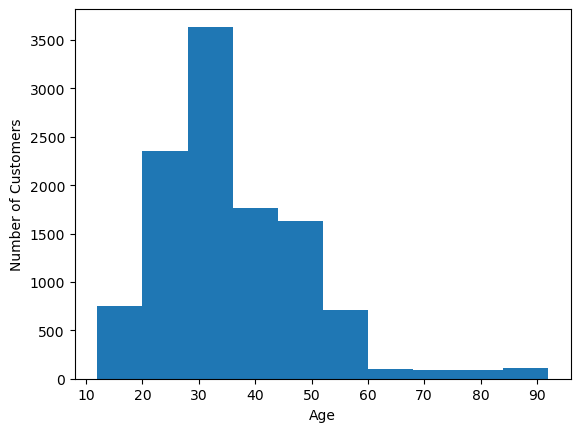

In [12]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


# 7. which state has highest sales?

In [13]:
state_sales = df.groupby('State')['Orders'].sum()
highest_sales_state = state_sales.idxmax()
print(highest_sales_state)

Uttar Pradesh


# 8. how does occupation effect the purchase ?

In [14]:
occupation_group = df.groupby('Occupation')
mean_purchase = occupation_group['Orders'].mean()
total_purchase = occupation_group['Orders'].sum()
purchase_count = occupation_group['Orders'].count()
summary_df = pd.DataFrame({'Mean Purchase Amount': mean_purchase,'Total Purchase Amount': total_purchase,'Purchase Count': purchase_count})
print(summary_df)


                 Mean Purchase Amount  Total Purchase Amount  Purchase Count
Occupation                                                                  
Agriculture                  2.551237                    722             283
Automobile                   2.426549                   1371             565
Aviation                     2.454198                   3215            1310
Banking                      2.477573                   2817            1137
Chemical                     2.419593                   1309             541
Construction                 2.475845                   1025             414
Food Processing              2.536643                   1073             423
Govt                         2.523419                   2155             854
Healthcare                   2.453835                   3455            1408
Hospitality                  2.473684                   1739             703
IT Sector                    2.524953                   3997            1583

# 9. which top 10 products to be sold?

In [17]:
product_sales = df.groupby('Product_Category')['Amount'].sum()
top_10_products = product_sales.sort_values(ascending=False).head(10)
print(top_10_products)

Product_Category
Food                     33933883.50
Clothing & Apparel       16495019.00
Electronics & Gadgets    15643846.00
Footwear & Shoes         15575209.45
Furniture                 5440051.99
Games & Toys              4331694.00
Sports Products           3635933.00
Beauty                    1959484.00
Auto                      1958609.99
Stationery                1676051.50
Name: Amount, dtype: float64


# 10. what is python function ? create a function to accept input (name) from the user and print "name" welcome to symbi

In [16]:
name = input("Enter your name: ")
def welcome(name):
    print(f"{name}, welcome to Symbi!")
welcome(name)

Enter your name: Aayush
Aayush, welcome to Symbi!
